<a href="https://colab.research.google.com/github/fennellclyde/ML/blob/main/LinearRegression_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

We learn a whole lot today! 

1. We learn about parametric models and we get to use one in practice
2. We learn about linear regression and how it fits into the ML picture


## Linear Regression

Linear regression is the most used model in practice, and it is our first parametric model, it has parameters which is calls weights and the algorithm associated with Linear regression concerns itself with finding what those weights will be.

In two dimensions Linear regression is easy to explain:

<blockquote>
Find the line of best fit through the X and y points.
</blockquote>


In more than two dimensions it becomes:

<blockquote>
Find the hyperplane of best fit through the X and y points.
</blockquote>


Let's explore what using linear regression feels like:

In [1]:
from sklearn.datasets import load_boston

boston_data = load_boston()

print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
print (boston_data['data'].shape)
print (boston_data['target'].shape)
print (boston_data['feature_names'])

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
from sklearn.model_selection import train_test_split

# we make our test set
X_train, X_test, y_train, y_test = train_test_split(boston_data['data'], boston_data['target'], test_size=0.2, random_state=1)

# and we make our validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

Training Dataset: The sample of data used to fit the model.

Validation Dataset: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. Model doesn't learn from this.

Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

In [4]:
print(X_train.shape, X_val.shape, X_test.shape)

(323, 13) (81, 13) (102, 13)


Let's visualize how using linear regression would work. Let's first look to see which features are the most correlated with the target:

In [5]:
import pandas as pd
import numpy as np

full_data = np.append(X_train, y_train.reshape(-1, 1), axis=-1)

full_df = pd.DataFrame(data=full_data, columns=np.append(boston_data['feature_names'], 'target'))

### EDA with Autoviz

In [12]:
pip install autoviz

     |████████████████████████████████| 50 kB 2.6 MB/s 
     |████████████████████████████████| 3.1 MB 9.7 MB/s 
     |████████████████████████████████| 132 kB 51.3 MB/s 


In [14]:
pip install xgboost

In [15]:
from autoviz.AutoViz_Class import AutoViz_Class


In [16]:
AV = AutoViz_Class()

Shape of your Data Set loaded: (323, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    13 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression VISUALIZATION Started #####################


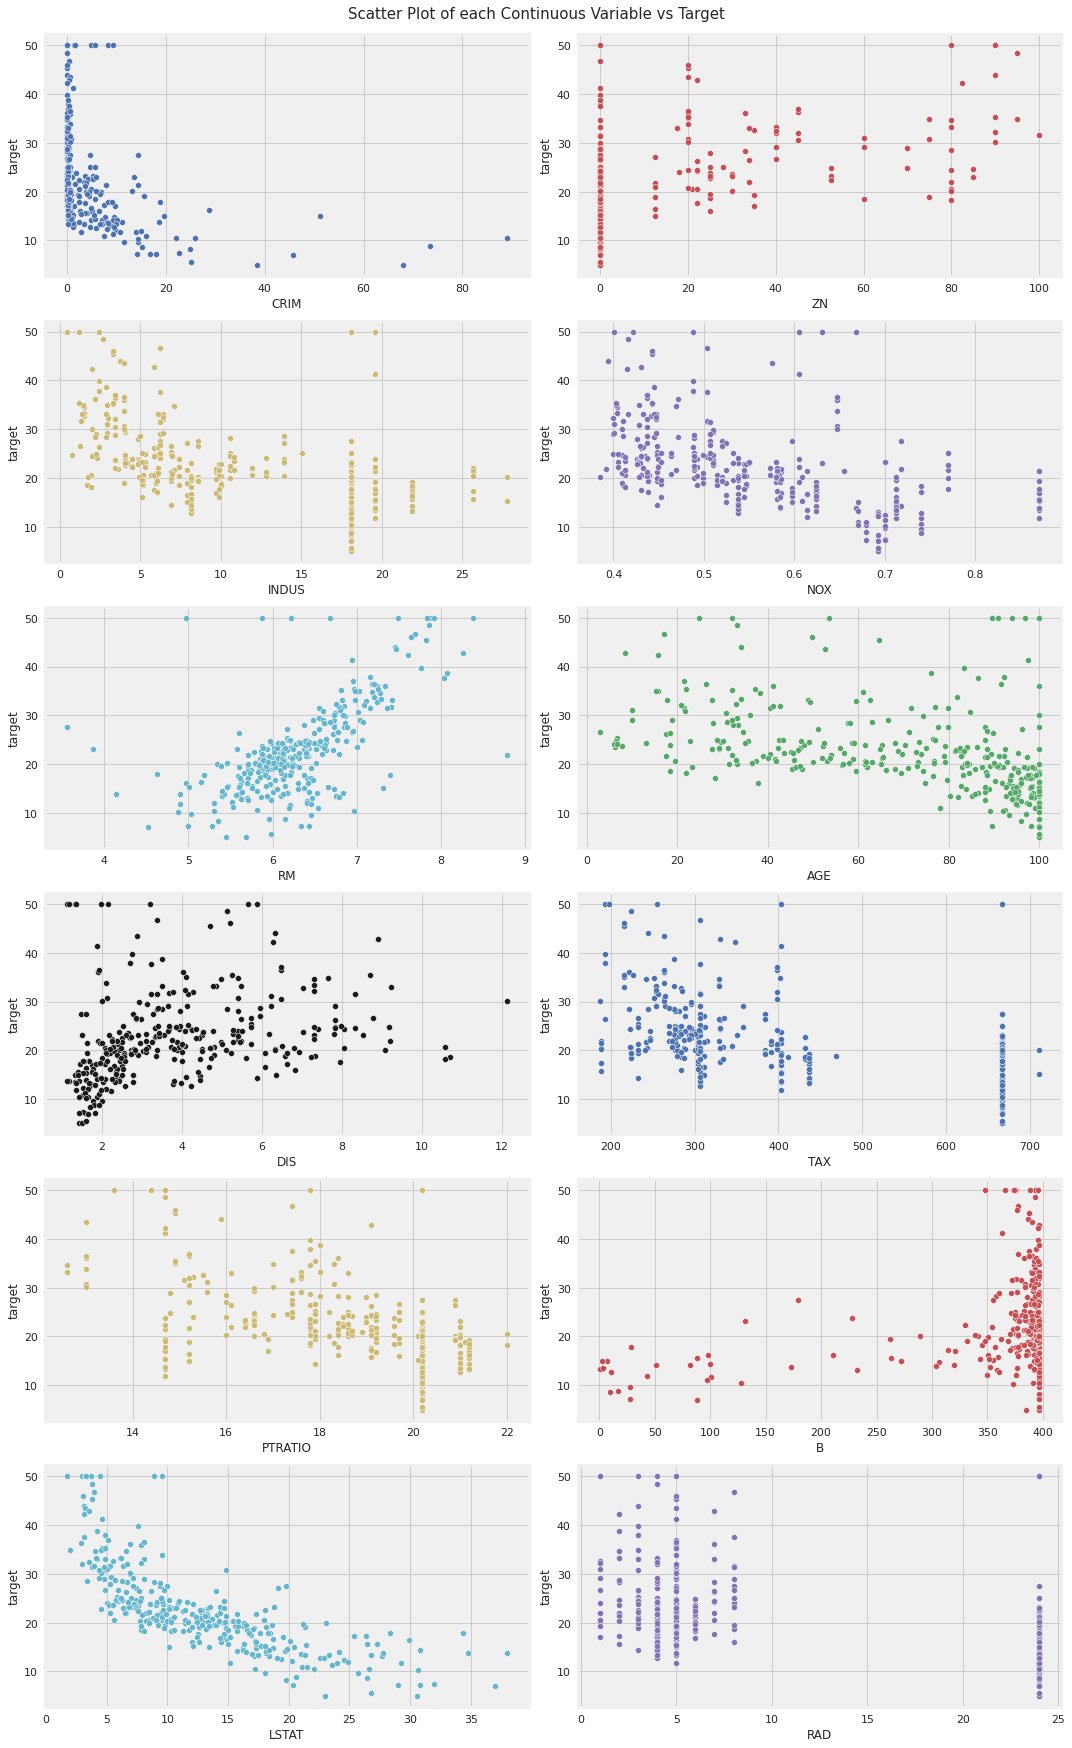

Number of All Scatter Plots = 78


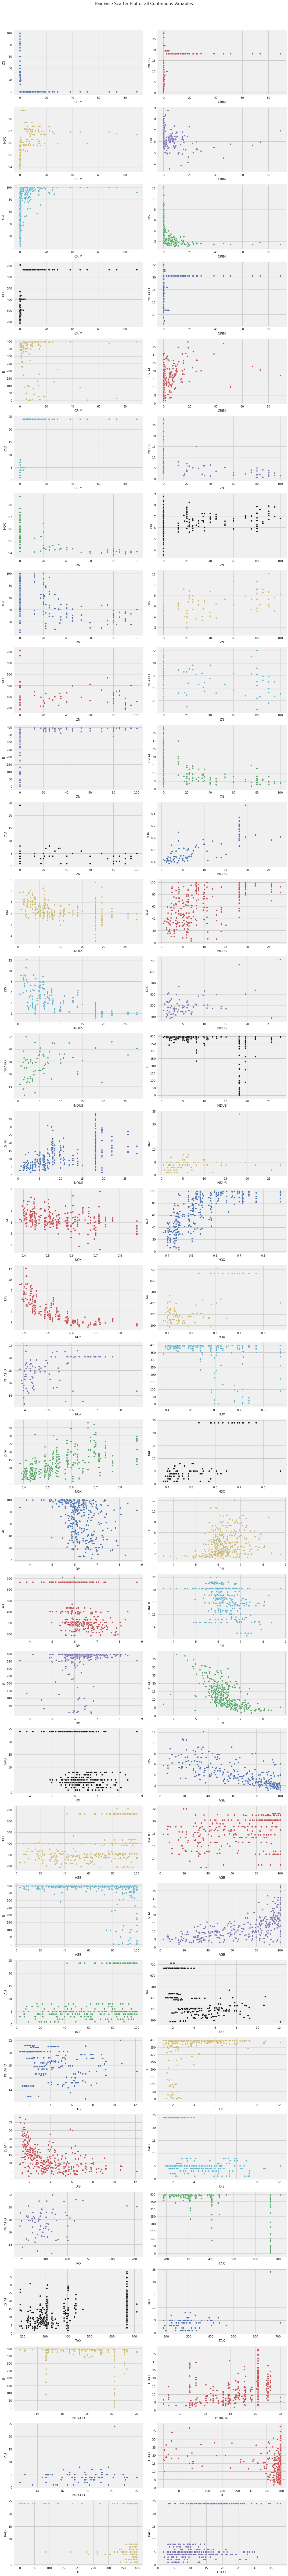

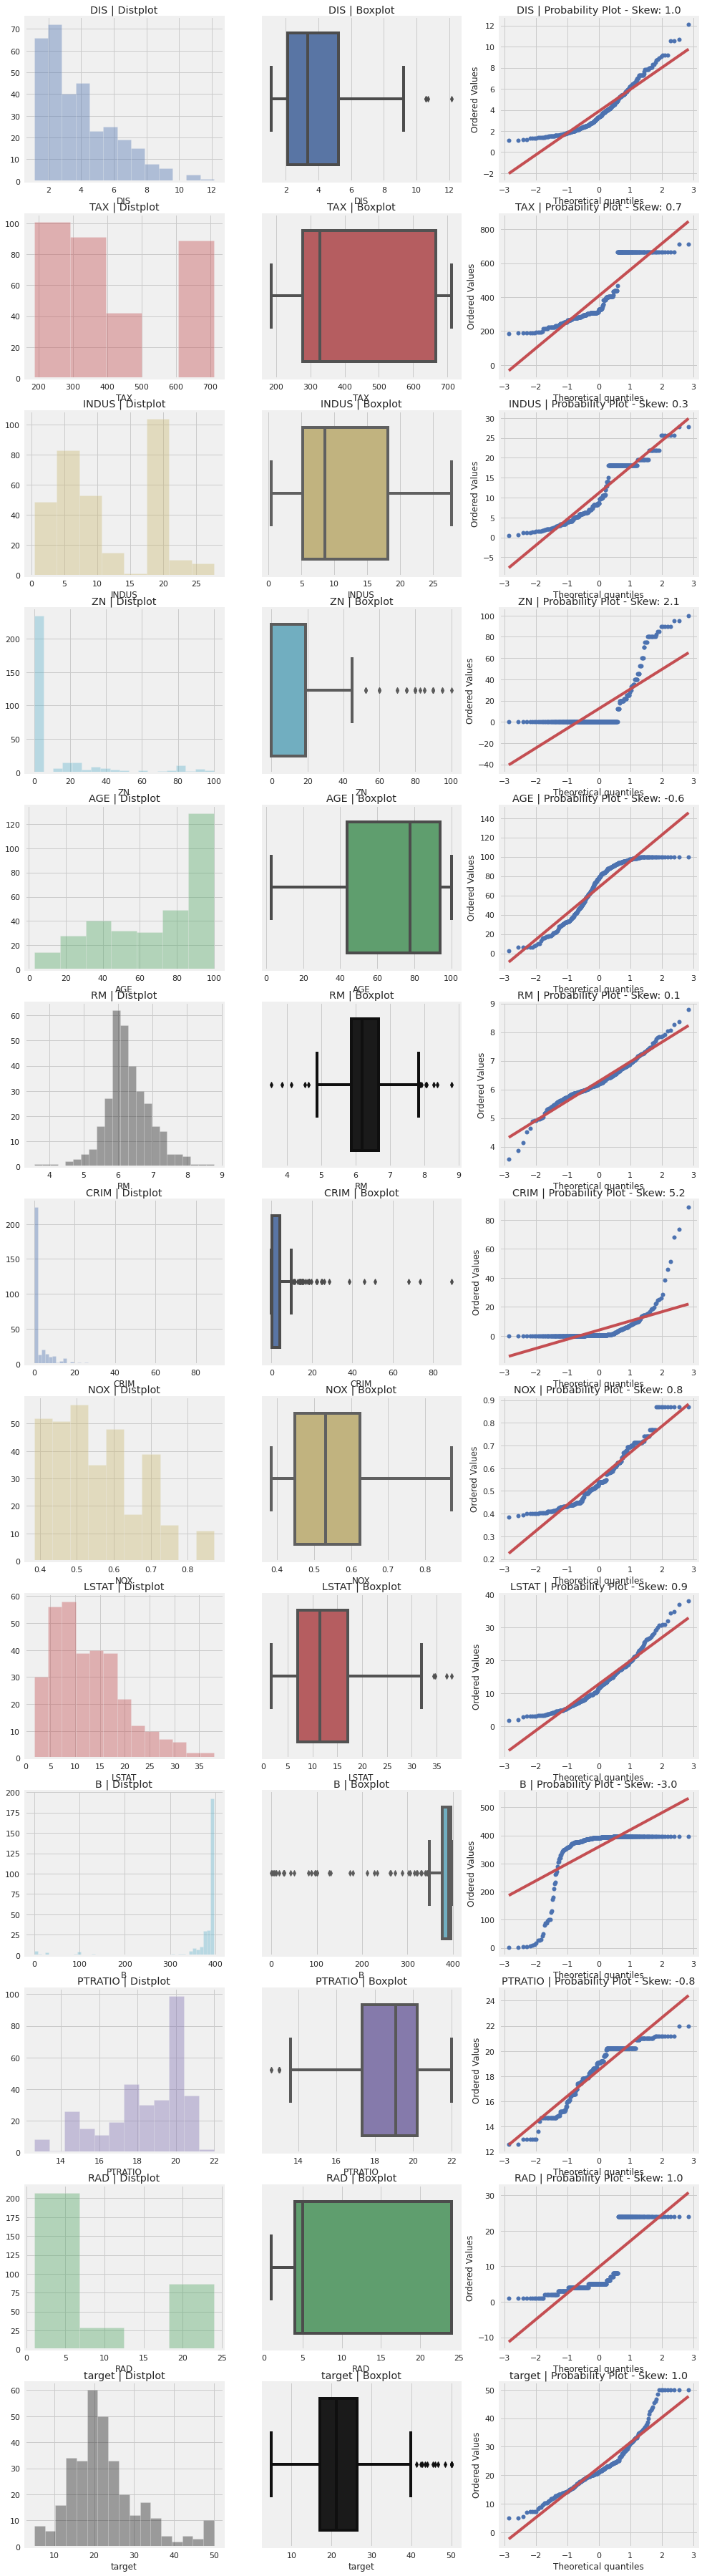

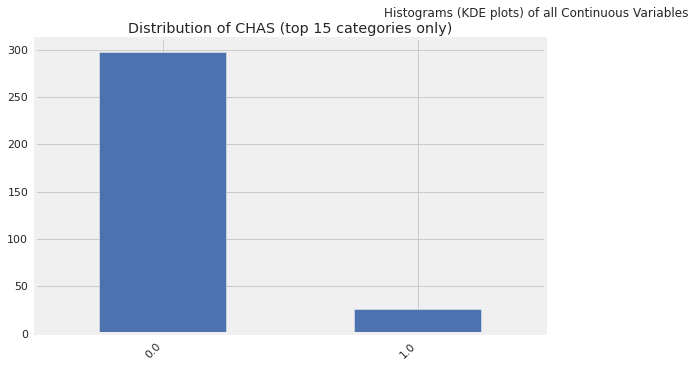

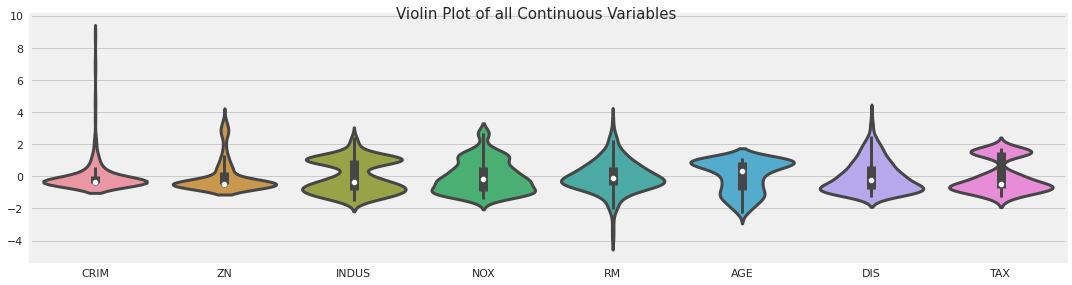

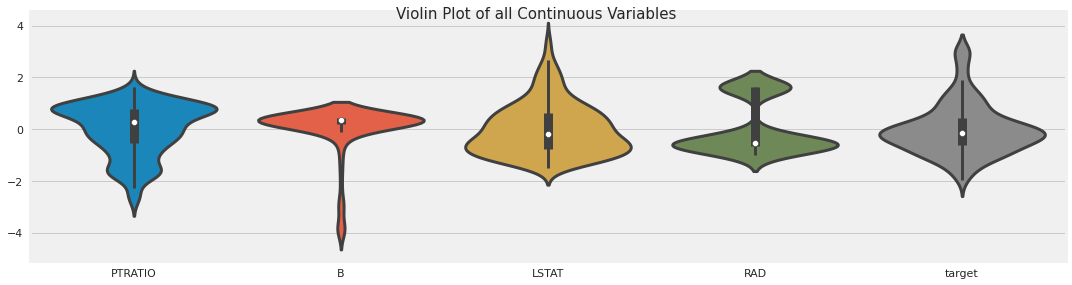

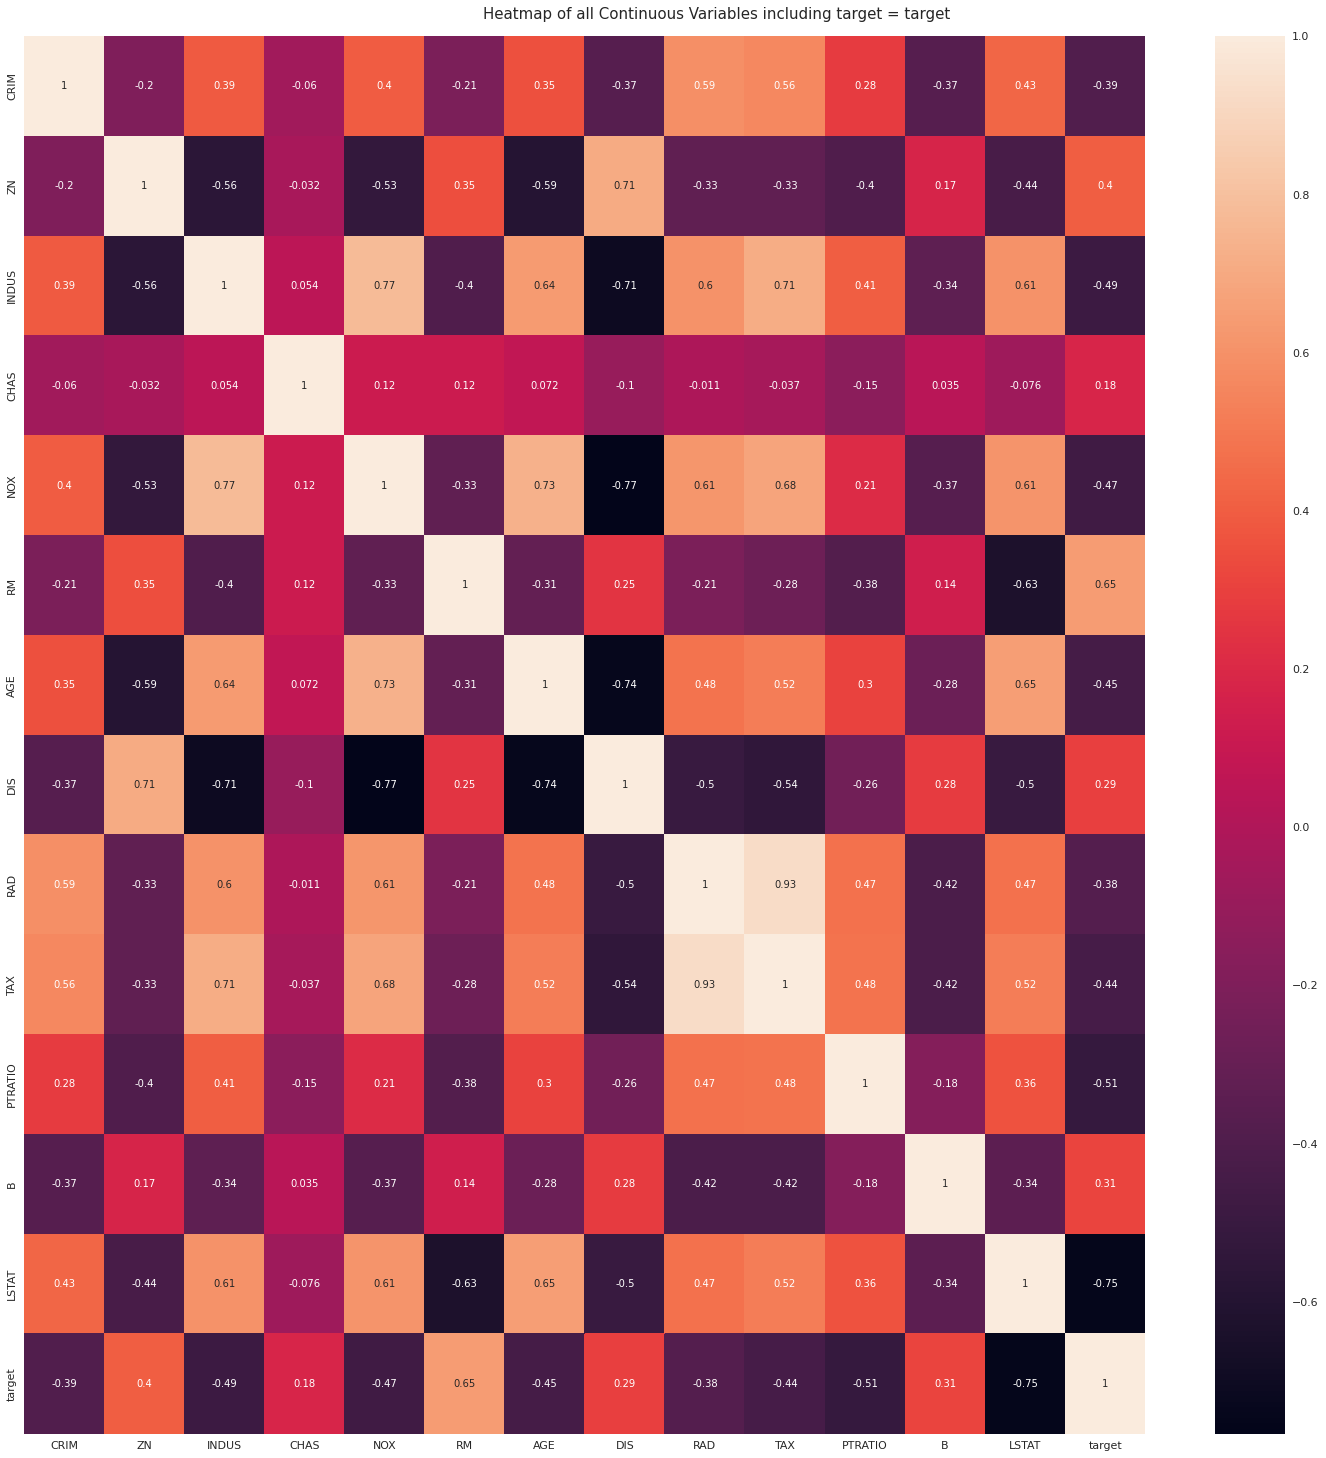

No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz (in seconds) = 41

 ###################### VISUALIZATION Completed ########################


In [17]:
filename = ""
sep = ","
dft = AV.AutoViz(
    "",
    sep,
    "target",
    full_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

### EDA with Pandas Profiler

In [26]:
pip install pandas-profiling notebook 

In [22]:
from pandas_profiling import ProfileReport

In [25]:
pd.__version__

'1.1.5'

In [29]:
profile = ProfileReport(full_df, title='Pandas Profiling Report')

TypeError: ignored

In [30]:
profile

default


### Manual Pair Plots

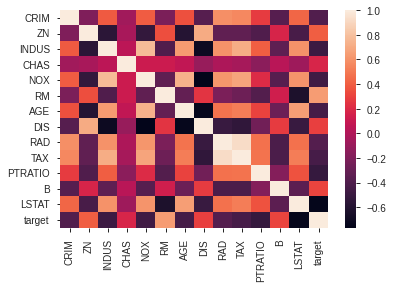

In [31]:
%matplotlib inline
import seaborn as sns

g = sns.heatmap(full_df.corr())
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)

We can see that some of the most correlated columns are: RM and LSTAT

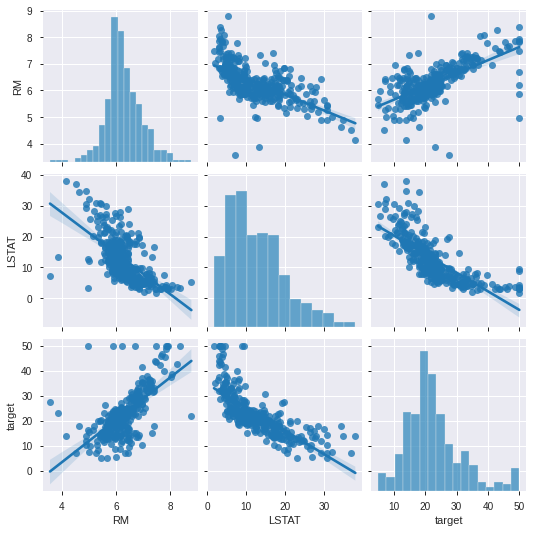

In [32]:
sns.pairplot(full_df[['RM', 'LSTAT', 'target']], kind='reg')

One of the weaknesses with linear regression however is that it cannot naively capture non-linear interactions. So perhaps two of the features above interact in a specific way, linear regression cannot find this out on its own.

Let's finish by doing the linear regression and then expaining its most common error measure:

In [33]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True) ##fit_intercept=False sets the y-intercept to 0. If fit_intercept=True, the y-intercept will be determined by the line of best fit.

In [34]:
reg.fit(X_train, y_train)

LinearRegression()

In [35]:
# we can see the model here
reg.coef_

array([-1.20993061e-01,  6.72093360e-02,  5.53683340e-02,  2.36126952e+00,
       -2.33979148e+01,  2.22800723e+00,  1.59383931e-02, -1.54199825e+00,
        3.15254152e-01, -1.00467809e-02, -1.06062853e+00,  5.98678332e-03,
       -6.12938742e-01])

In [36]:
predicted = reg.predict(X_test)[0]

In [37]:
predicted

32.618960095797576

In [38]:
# first we show the R^2
reg.score(X_test, y_test)

0.7383194748962919

R squared: this gives you the percent of the variance that the model explains. You would be happy to get a model with over .8 r squared (note that sklearn returns the negative r squared.

In [39]:
from sklearn.metrics import mean_absolute_error

# second we show the mean absolute error
mean_absolute_error(reg.predict(X_test), y_test)

3.9355674144009867

## How'd we do

We showed two measures: r-squared and MAE:

* Mean Absolute Error: the MAE is how off we are on average. This is generally more business interpretable than MSE
* R squared: this gives you the percent of the variance that the model explains. You would be happy to get a model with over .8 r squared (note the sklearn returns the negative r squared.

So in short, linear regression did not do too well. Perhaps one of the reasons is because of interactions in the data. 

## Learning Objectives

We learn a whole lot today! 

1. We learn about parametric models and we get to use one in practice
2. We learn about linear regression and how it fits into the ML picture
